In [2]:
# Cell 1: Install Correct Library Versions
!pip install "transformers==4.30.2" "tensorflow==2.15.0"
print("✅ Libraries installed.")
print("🔴 IMPORTANT: You MUST restart your runtime now!")
print("Go to 'Runtime' -> 'Restart runtime' in the menu above.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 74.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings

# --- ML & Data ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# --- Transformers (BERT) ---
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

# --- Setup ---
warnings.filterwarnings('ignore')
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
stop_words = set(stopwords.words('english'))

print("✅ All libraries imported.")
print(f"TensorFlow Version: {tf.__version__}")

2025-10-29 15:19:08.702098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-29 15:19:08.702166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-29 15:19:08.704255: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ All libraries imported.
TensorFlow Version: 2.15.0


In [4]:
file_name="/kaggle/input/fakejobpost/fake_job_postings.csv"
df=pd.read_csv(file_name)

In [5]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for col in text_columns:
    df[col] = df[col].fillna('')

df['text_combined'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)

In [7]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text_combined
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,NaN,NaN,Marketing,0,"Marketing Intern We're Food52, and we've creat..."
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production 90 S...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,NaN,NaN,NaN,NaN,NaN,0,Commissioning Machinery Assistant (CMA) Valor ...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Account Executive - Washington DC Our passion ...
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bill Review Manager SpotSource Solutions LLC i...


In [8]:
metadata_features = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
df[metadata_features] = df[metadata_features].fillna('Missing')

encoders = {}
for col in metadata_features:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le

In [9]:
metadata_vocab_sizes = {col: len(encoders[col].classes_) for col in metadata_features}
print(f"Metadata encoded. Vocab sizes: {metadata_vocab_sizes}")


target = 'fraudulent'
y = df[target].values

print("✅ Data preprocessing complete.")
print(df[['text_combined', 'employment_type_encoded', 'fraudulent']].head())

Metadata encoded. Vocab sizes: {'employment_type': 6, 'required_experience': 8, 'required_education': 14, 'industry': 132, 'function': 38}
✅ Data preprocessing complete.
                                       text_combined  employment_type_encoded  \
0  Marketing Intern We're Food52, and we've creat...                        3   
1  Customer Service - Cloud Video Production 90 S...                        1   
2  Commissioning Machinery Assistant (CMA) Valor ...                        2   
3  Account Executive - Washington DC Our passion ...                        1   
4  Bill Review Manager SpotSource Solutions LLC i...                        1   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0  


In [10]:
print("--- 2. Stage 1 (BERT) - Tokenization ---")

# We need to import AutoTokenizer
from transformers import AutoTokenizer

MODEL_NAME = 'distilbert-base-uncased'

# --- 1. Split Data ---
# We are using the *entire* 'df' DataFrame
y_data = df[target].values
X_text_data = df['text_combined'].tolist()

X_train_text, X_val_text, y_train, y_val = train_test_split(
    X_text_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# --- 2. Tokenize Text ---
# --- THE FIX ---
# Use AutoTokenizer, which is smarter and avoids this error
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_encodings = tokenizer(X_train_text, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(X_val_text, truncation=True, padding=True, max_length=128)

# --- 3. Create TensorFlow Datasets ---
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val
)).batch(16)

print(f"✅ Data tokenized and split: {len(X_train_text)} train, {len(X_val_text)} validation.")

--- 2. Stage 1 (BERT) - Tokenization ---


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

✅ Data tokenized and split: 14304 train, 3576 validation.


--- 3. Stage 1 (BERT) - Building and Fine-Tuning ---
Using model: distilbert-base-uncased
⏳ Training will take time. Please wait...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Model 'distilbert-base-uncased' loaded successfully.
Model compiled successfully.
Starting training for 2 epochs...
Epoch 1/2
894/894 [==============================] - 3417s 4s/step - loss: 0.0980 - accuracy: 0.9709 - val_loss: 0.0471 - val_accuracy: 0.9883
Epoch 2/2
894/894 [==============================] - 3315s 4s/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.0406 - val_accuracy: 0.9885

✅ Stage 1 (BERT) model fine-tuning complete after 2 epochs.
💾 Final model (after epoch 2) saved to '/kaggle/working/stage1_bert_epoch_02_final.keras'.


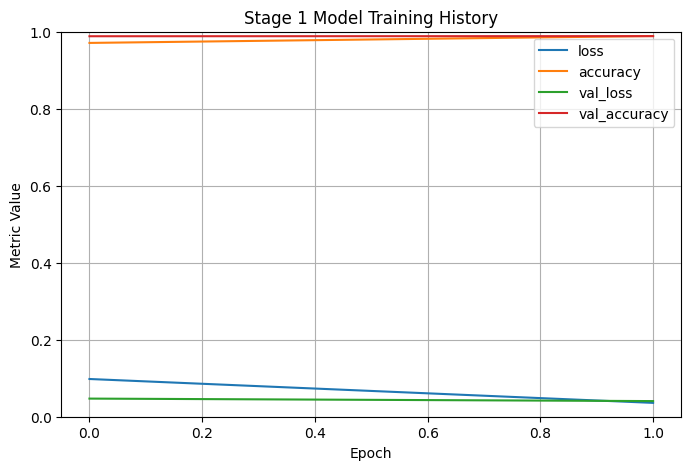

In [12]:
# Cell 5: Stage 1 - Build & Fine-Tune BERT Model (saves only final epoch - Corrected)
print("--- 3. Stage 1 (BERT) - Building and Fine-Tuning ---")
# Assumes MODEL_NAME, train_dataset, val_dataset are defined earlier
print(f"Using model: {MODEL_NAME}")
print("⏳ Training will take time. Please wait...")

# --- Import necessary components ---
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
# Import TFAutoModel if not already imported globally or in a previous cell run in this session
from transformers import TFAutoModelForSequenceClassification

# --- 1. Load Pre-trained Model ---
try:
    stage1_model = TFAutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
    print(f"Model '{MODEL_NAME}' loaded successfully.")
except NameError:
    print("❌ ERROR: 'MODEL_NAME' is not defined. Please run the previous cell (Cell 4) first.")
    raise
except Exception as e:
    print(f"❌ Error loading model '{MODEL_NAME}'. Check model name and internet connection.")
    print("If in Kaggle, ensure 'Internet' is turned ON in the settings panel.")
    raise e

# --- 2. Define Training Parameters & Compile Model ---
LEARNING_RATE = 2e-5 # Define the learning rate here
loss = SparseCategoricalCrossentropy(from_logits=True) # Define the loss function
metric = SparseCategoricalAccuracy('accuracy') # Define the metric

optimizer = Adam(learning_rate=LEARNING_RATE)
stage1_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
print("Model compiled successfully.")

# --- 3. Train (Fine-Tune) the Model ---
NUM_EPOCHS = 2 # Set number of epochs to 2
print(f"Starting training for {NUM_EPOCHS} epochs...")

# Ensure datasets are available from Cell 4
try:
    history = stage1_model.fit(
        train_dataset,
        epochs=NUM_EPOCHS,
        validation_data=val_dataset
        # No callbacks needed for saving just the final model
    )
except NameError:
    print("❌ ERROR: 'train_dataset' or 'val_dataset' not defined. Please run Cell 4 first.")
    raise

print(f"\n✅ Stage 1 (BERT) model fine-tuning complete after {NUM_EPOCHS} epochs.")

# --- SAVE THE FINAL MODEL ---
# Using /kaggle/working/ for Kaggle persistence
final_model_filepath = '/kaggle/working/stage1_bert_epoch_02_final.keras'
stage1_model.save(final_model_filepath)
print(f"💾 Final model (after epoch {NUM_EPOCHS}) saved to '{final_model_filepath}'.")


# --- Optional: Plot training history ---
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # Adjust y-limit if needed
    plt.title("Stage 1 Model Training History")
    plt.xlabel("Epoch")
    plt.ylabel("Metric Value")
    plt.show()
except NameError as e:
     print(f"Could not plot history: Import missing? ({e})")
except Exception as e:
     print(f"Could not plot history due to error: {e}")

In [16]:
# Cell 11: Explain Stage 1 (BERT) with SHAP (Corrected Fallback & Checks)
print("--- 9. Explain Stage 1 (BERT) with SHAP ---")

# --- Import SHAP ---
try:
    import shap
    print(f"SHAP version: {shap.__version__}")
except ImportError:
    print("Installing SHAP...")
    !pip install shap
    import shap

# --- Check if key variables exist BEFORE proceeding ---
try:
    _ = tokenizer # Check if tokenizer exists
    _ = stage1_model # Check if stage1_model exists
    print("✅ Tokenizer and Stage 1 Model found in global scope.")
except NameError as e:
    print(f"❌ ERROR: Variable '{e.name}' not defined. Please ensure Cell 4 and Cell 5 ran successfully.")
    raise # Stop execution

# --- 1. Select a SMALL Sample for Explanation ---
SAMPLE_EXPLAIN_SIZE = 50
try:
    if len(X_val_text) < SAMPLE_EXPLAIN_SIZE: SAMPLE_EXPLAIN_SIZE = len(X_val_text)
    X_explain_text = X_val_text[:SAMPLE_EXPLAIN_SIZE]
    y_explain_labels = y_val[:SAMPLE_EXPLAIN_SIZE]
    print(f"Selected {SAMPLE_EXPLAIN_SIZE} samples from validation set for SHAP.")
except NameError:
    print("❌ ERROR: 'X_val_text' or 'y_val' not defined. Re-run Cell 4.")
    raise

# --- 2. Define the Wrapper Prediction Function ---
# Ensure MAX_LEN is defined (from Cell 4)
try: _ = MAX_LEN
except NameError: MAX_LEN = 128 # Fallback, but should be defined in Cell 4

# --- FIXED FALLBACK PATH ---
CORRECT_MODEL_PATH = '/kaggle/working/stage1_bert_epoch_02_final.keras'

def predict_proba_wrapper(text_list):
    if isinstance(text_list, np.ndarray): text_list = text_list.tolist()
    global tokenizer, stage1_model # Access global variables explicitly

    try:
        # Try using the variables directly first
        inputs = tokenizer(text_list, return_tensors='tf', truncation=True, padding=True, max_length=MAX_LEN)
        outputs = stage1_model(inputs)
        logits = outputs.logits
        probs = tf.nn.softmax(logits, axis=-1).numpy()
        return probs
    except NameError:
        print("ERROR in wrapper: Global 'tokenizer' or 'stage1_model' not accessible.")
        # Attempt to load model using CORRECT path
        try:
            print(f"Attempting to load saved model from: {CORRECT_MODEL_PATH}")
            # Ensure TFAutoModel is imported for custom objects
            from transformers import TFAutoModelForSequenceClassification
            loaded_model = tf.keras.models.load_model(CORRECT_MODEL_PATH, custom_objects={"TFAutoModelForSequenceClassification": TFAutoModelForSequenceClassification})
            # Assume tokenizer is still available globally if model isn't? This part is tricky.
            # If tokenizer is also lost, this will fail again.
            inputs = tokenizer(text_list, return_tensors='tf', truncation=True, padding=True, max_length=MAX_LEN)
            outputs = loaded_model(inputs)
            logits = outputs.logits
            probs = tf.nn.softmax(logits, axis=-1).numpy()
            print("Loaded model used for prediction.")
            stage1_model = loaded_model # Try to set it globally again
            return probs
        except NameError: # If tokenizer is ALSO lost
             print("ERROR: Tokenizer is also undefined in fallback. Cannot proceed.")
             return np.zeros((len(text_list), 2))
        except Exception as load_err:
             print(f"Failed to load saved model from {CORRECT_MODEL_PATH}: {load_err}")
             return np.zeros((len(text_list), 2)) # Fallback
    except Exception as e:
        print(f"An error occurred during prediction in wrapper: {e}")
        return np.zeros((len(text_list), 2)) # Fallback

print("✅ Wrapper prediction function defined/checked.")

# --- 3. Create the Explicit Text Masker ---
try:
    masker = shap.maskers.Text(tokenizer)
    print("✅ Text masker created successfully.")
except NameError:
    print("❌ ERROR: 'tokenizer' not defined. Re-run Cell 4.")
    raise

# --- 4. Create the SHAP Explainer using the Wrapper and Masker ---
print("Initializing SHAP Explainer with wrapper and text masker...")
explainer_stage1 = shap.Explainer(predict_proba_wrapper, masker)
print("Explainer initialized.")

# --- 5. Calculate SHAP Values ---
print(f"Calculating SHAP values for {SAMPLE_EXPLAIN_SIZE} samples... (This will take a significant amount of time!)")
try:
    shap_values_stage1 = explainer_stage1(X_explain_text)
    print("✅ SHAP values calculated for Stage 1.")
except Exception as e:
    print(f"❌ Error during SHAP value calculation: {e}")
    raise

# --- 6. Visualize Explanations ---
sample_idx = 0
try:
    print(f"\n--- Explaining Sample {sample_idx} ---")
    print(f"Text: {X_explain_text[sample_idx][:200]}...")
    print(f"Actual Label: {'Fake' if y_explain_labels[sample_idx] == 1 else 'Real'}")

    predicted_probs = predict_proba_wrapper([X_explain_text[sample_idx]])
    print(f"Predicted Base Risk (Fake): {predicted_probs[0, 1]:.1%}")

    # Create Explanation object manually for plotting
    exp = shap.Explanation(values=shap_values_stage1.values[sample_idx,:,1],
                           base_values=shap_values_stage1.base_values[sample_idx,1],
                           data=shap_values_stage1.data[sample_idx],
                           feature_names=tokenizer.convert_ids_to_tokens(shap_values_stage1.data[sample_idx]))

    shap.plots.text(exp)

except IndexError:
     print(f"❌ Error accessing SHAP values for sample {sample_idx}.")
except AttributeError:
     print("❌ Error: shap_values_stage1 object structure issue.")
except Exception as e:
     print(f"❌ An error occurred during visualization: {e}")

--- 9. Explain Stage 1 (BERT) with SHAP ---
SHAP version: 0.44.1
✅ Tokenizer and Stage 1 Model found in global scope.
Selected 50 samples from validation set for SHAP.
✅ Wrapper prediction function defined/checked.
✅ Text masker created successfully.
Initializing SHAP Explainer with wrapper and text masker...
Explainer initialized.
Calculating SHAP values for 50 samples... (This will take a significant amount of time!)


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 1/50 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▌         | 3/50 [01:30<17:53, 22.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 4/50 [02:16<24:54, 32.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 5/50 [03:04<28:41, 38.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  12%|█▏        | 6/50 [03:50<30:04, 41.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  14%|█▍        | 7/50 [04:37<30:38, 42.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  16%|█▌        | 8/50 [05:23<30:48, 44.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  18%|█▊        | 9/50 [06:09<30:26, 44.55s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  20%|██        | 10/50 [06:55<30:01, 45.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  22%|██▏       | 11/50 [07:40<29:14, 44.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  24%|██▍       | 12/50 [08:26<28:44, 45.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  26%|██▌       | 13/50 [09:12<28:00, 45.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  28%|██▊       | 14/50 [09:58<27:22, 45.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  30%|███       | 15/50 [10:43<26:35, 45.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  32%|███▏      | 16/50 [11:29<25:52, 45.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  34%|███▍      | 17/50 [12:15<25:08, 45.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  36%|███▌      | 18/50 [13:00<24:18, 45.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  38%|███▊      | 19/50 [13:37<22:09, 42.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|████      | 20/50 [14:22<21:44, 43.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  42%|████▏     | 21/50 [15:07<21:16, 44.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  44%|████▍     | 22/50 [15:53<20:47, 44.55s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  46%|████▌     | 23/50 [16:38<20:06, 44.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  48%|████▊     | 24/50 [17:23<19:25, 44.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 25/50 [18:08<18:43, 44.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  52%|█████▏    | 26/50 [18:54<18:04, 45.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  54%|█████▍    | 27/50 [19:39<17:19, 45.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  56%|█████▌    | 28/50 [20:24<16:34, 45.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  58%|█████▊    | 29/50 [21:11<15:57, 45.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  60%|██████    | 30/50 [21:56<15:08, 45.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  62%|██████▏   | 31/50 [22:41<14:22, 45.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  64%|██████▍   | 32/50 [23:28<13:42, 45.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  66%|██████▌   | 33/50 [24:16<13:07, 46.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  68%|██████▊   | 34/50 [25:01<12:16, 46.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  70%|███████   | 35/50 [25:47<11:30, 46.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  72%|███████▏  | 36/50 [26:33<10:43, 45.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  74%|███████▍  | 37/50 [27:19<09:57, 46.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  76%|███████▌  | 38/50 [28:05<09:12, 46.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  78%|███████▊  | 39/50 [28:50<08:23, 45.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  80%|████████  | 40/50 [29:35<07:35, 45.55s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  82%|████████▏ | 41/50 [30:21<06:50, 45.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  84%|████████▍ | 42/50 [30:40<05:00, 37.53s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  86%|████████▌ | 43/50 [31:25<04:39, 39.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  88%|████████▊ | 44/50 [32:09<04:07, 41.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  90%|█████████ | 45/50 [32:54<03:31, 42.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  92%|█████████▏| 46/50 [33:39<02:51, 43.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  94%|█████████▍| 47/50 [34:24<02:10, 43.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  96%|█████████▌| 48/50 [35:08<01:27, 43.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  98%|█████████▊| 49/50 [35:55<00:44, 44.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 50/50 [36:40<00:00, 44.67s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 51it [37:25, 44.90s/it]                        


✅ SHAP values calculated for Stage 1.

--- Explaining Sample 0 ---
Text: EXCELLENT ER RN Opportunity Available Now  Our client, located in Urban, IL, is looking for an ER RN to become a member of their team ASAP!Our client is an institution of high quality care, medical re...
Actual Label: Real
Predicted Base Risk (Fake): 0.1%
❌ Error accessing SHAP values for sample 0.


In [37]:
sample_idx = 37
try:
    print(f"\n--- Explaining Sample {sample_idx} ---")
    print(f"Text: {X_explain_text[sample_idx][:200]}...")
    print(f"Actual Label: {'Fake' if y_explain_labels[sample_idx] == 1 else 'Real'}")

    predicted_probs = predict_proba_wrapper([X_explain_text[sample_idx]])
    print(f"Predicted Base Risk (Fake): {predicted_probs[0, 1]:.1%}")

    # Plot explanation for the 'Fake' class (index 1) directly
    # shap_values_stage1[sample_idx] gives the Explanation for the first sample
    # shap_values_stage1[sample_idx, :, 1] accesses the values for all tokens for class 1
    shap.plots.text(shap_values_stage1[sample_idx, :, 1])

except IndexError:
     print(f"❌ IndexError during plotting. The structure of shap_values_stage1 might be unexpected.")
     print("   Try plotting without the class index: shap.plots.text(shap_values_stage1[sample_idx])")
     # Or try inspecting the object: print(dir(shap_values_stage1)) print(shap_values_stage1[sample_idx])
except AttributeError:
     print("❌ AttributeError: shap_values_stage1 object structure issue. SHAP calculation may have failed.")
except Exception as e:
     print(f"❌ An error occurred during visualization: {e}")


--- Explaining Sample 37 ---
Text: Position Finance Assistant  We have positions available for confident, out-going, enthusiastic candidates to join our team of financial assistant.Role and activities:Understand requirements of custome...
Actual Label: Fake
Predicted Base Risk (Fake): 88.1%


In [35]:
# Cell to find a fake job index in the validation set
try:
    # Find the first index where the validation label is 1 (Fake)
    fake_job_indices = np.where(y_val == 1)[0]
    if len(fake_job_indices) > 0:
        fake_job_explain_idx = fake_job_indices[0] # Get the first one
        print(f"✅ Found a 'Fake' job in the validation set at index: {fake_job_explain_idx}")
        print(f"   Text starts with: '{X_val_text[fake_job_explain_idx][:100]}...'")
    else:
        fake_job_explain_idx = 0 # Fallback to the first job if no fakes found
        print("⚠️ No 'Fake' jobs found in the validation set sample. Explaining the first job instead.")
except NameError:
    print("❌ ERROR: 'y_val' or 'X_val_text' not defined. Please run Cell 4 first.")
    # Set a default index to prevent later errors, though explanation might be wrong
    fake_job_explain_idx = 0

✅ Found a 'Fake' job in the validation set at index: 37
   Text starts with: 'Position Finance Assistant  We have positions available for confident, out-going, enthusiastic candi...'


In [38]:
# --- Save Stage 1 SHAP Values (Explanation Object) ---
# Option A: Save the whole object using joblib (recommended for complex objects)
import joblib

shap_explanation_filepath = '/kaggle/working/stage1_shap_explanation.joblib'
try:
    joblib.dump(shap_values_stage1, shap_explanation_filepath)
    print(f"✅ Stage 1 SHAP Explanation object saved to: {shap_explanation_filepath}")
except NameError:
    print("❌ ERROR: 'shap_values_stage1' not defined. Run SHAP calculation first.")
except Exception as e:
    print(f"❌ Error saving Stage 1 SHAP Explanation object: {e}")

# Option B: Save components as NumPy arrays (more robust across library versions)
shap_arrays_filepath = '/kaggle/working/stage1_shap_arrays.npz'
try:
    np.savez(
        shap_arrays_filepath,
        values=shap_values_stage1.values,         # The actual SHAP values
        base_values=shap_values_stage1.base_values, # The base prediction value
        data=shap_values_stage1.data              # The input data (token IDs)
        # Add feature_names if available and needed
    )
    print(f"✅ Stage 1 SHAP components saved to: {shap_arrays_filepath}")
except NameError:
    print("❌ ERROR: 'shap_values_stage1' not defined.")
except AttributeError:
     print("❌ ERROR: 'shap_values_stage1' object might not have expected attributes (.values, .base_values, .data).")
except Exception as e:
    print(f"❌ Error saving Stage 1 SHAP components: {e}")


# --- Save Stage 2 SHAP Values (NumPy Array) ---
shap_mlp_values_filepath = '/kaggle/working/stage2_mlp_shap_values.npy'
expected_value_filepath = '/kaggle/working/stage2_mlp_expected_value.npy'

try:
    # Save the main SHAP values array
    np.save(shap_mlp_values_filepath, shap_values_stage2_array)
    print(f"✅ Stage 2 SHAP values saved to: {shap_mlp_values_filepath}")

    # Save the explainer's expected value (base prediction)
    np.save(expected_value_filepath, explainer_stage2.expected_value)
    print(f"✅ Stage 2 expected value saved to: {expected_value_filepath}")
except NameError:
    print("❌ ERROR: 'shap_values_stage2_array' or 'explainer_stage2' not defined. Run SHAP calculation first.")
except Exception as e:
    print(f"❌ Error saving Stage 2 SHAP values: {e}")

✅ Stage 1 SHAP Explanation object saved to: /kaggle/working/stage1_shap_explanation.joblib
❌ Error saving Stage 1 SHAP components: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (50,) + inhomogeneous part.
❌ ERROR: 'shap_values_stage2_array' or 'explainer_stage2' not defined. Run SHAP calculation first.


In [39]:
import joblib

# --- Save Stage 1 Explainer ---
explainer1_filepath = '/kaggle/working/stage1_shap_explainer.joblib'
try:
    joblib.dump(explainer_stage1, explainer1_filepath)
    print(f"✅ Stage 1 Explainer saved to: {explainer1_filepath}")
except NameError:
    print("❌ ERROR: 'explainer_stage1' not defined. Initialize it first.")
except Exception as e:
    print(f"❌ Error saving Stage 1 Explainer: {e}")


# --- Save Stage 2 Explainer ---
explainer2_filepath = '/kaggle/working/stage2_shap_explainer.joblib'
try:
    joblib.dump(explainer_stage2, explainer2_filepath)
    print(f"✅ Stage 2 Explainer saved to: {explainer2_filepath}")
except NameError:
    print("❌ ERROR: 'explainer_stage2' not defined. Initialize it first.")
except Exception as e:
    print(f"❌ Error saving Stage 2 Explainer: {e}")

✅ Stage 1 Explainer saved to: /kaggle/working/stage1_shap_explainer.joblib
❌ ERROR: 'explainer_stage2' not defined. Initialize it first.
